In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as web

from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [3]:
start  = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
#df = web.DataReader('TSLA',"yahoo",start,end)
df = pd.read_csv('tsla.cvs',parse_dates=True,index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# Resample

You can take some information and resample it too you could resample it down but it won't work but you can also resemble  it greater so for example:

Let say you have sensors that collect data about the temperature and humidity of your servers and they just kind of randomly collect data or
probably a better term or a better idea okay in your role in your 
business you want to count how many people walk throuhg doorway this is
very random right

the people that might walk through and you real curiosity is like how
many people come through an hour okay but you've got data that comes through maybe every minute or every two minutes sometime or three minutes
or whatever but you really care about that hourly number what you could 
do if you had a data frame that just contain columns of people walking 
through you could resample it you can resample it to one hour of data so 
it would take all the data resample it to one hour if you use a resample
sum it would add them all up and it would tell you okay every hour of this
how many people you get with stock information 

we have currently daily data but we're going to resample it to ten day data so if you have huge data that you don't need to be huge for example if this was like tick data that was like millisecond data and we didn't
need to be working with millisecond data we could resample that data to
one day data like we have or ten day data or just minute data so you have
a ton of options here so let's go ahead and do that so we

Medir la cantidad de personas que pasan en un pasillo, y tienes un sensor que mide cada minute la cantidad de personas que pasan, pero tu solo estas interesado en saber la cantidad de personas que pasan en una hora, asi que (resample that)

## open high/low close ohlc

WE are starting with open high low close data yes Tesla I've never had a stock split so in theory we could have skipped this step but a lot of 
companies do have stock splits and you won't be able to use that data 
you're gonna have to create your own based on the adjusted closed so 


In [ ]:

#df_ohlc = df['Adj Close'].resample('10D')
#df_ohlc = df['Adj Close'].resample('10Min')
#df_ohlc = df['Adj Close'].resample('6Min')

#df_ohlc = df['Adj Close'].resample('10D').mean()

df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [6]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [8]:
# in this case we'll use some you probably can use mean
# I think some makes a little more sense so I'm going to use
# some because that's the true volume not the average of all 
# I am over 10 days. you'll probably really want the true volume

df_volume = df['Volume'].resample('10D').sum()

In [9]:
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64

In [29]:
## A day in matplotlib is like 700,000

In [27]:
df_ohlc2 = df_ohlc.reset_index()
df_ohlc2['Date'] = df_ohlc2['Date'].map(mdates.date2num)

In [30]:
df_ohlc2.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


<IPython.core.display.Javascript object>


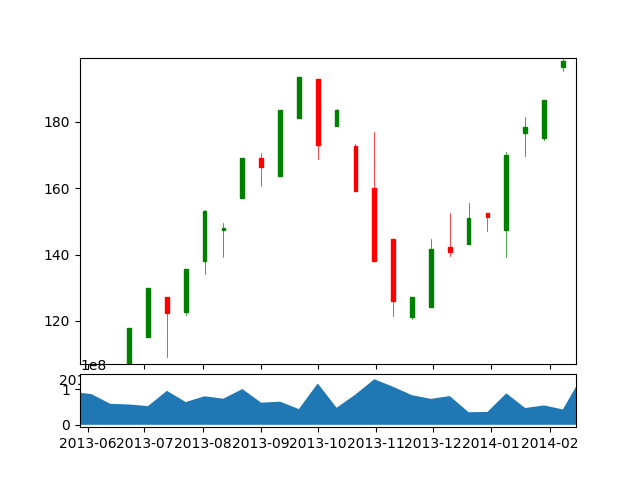

In [37]:
plt.figure()
ax1 = plt.subplot2grid( (6,1), (0,0),rowspan=5,colspan=1 )
ax2 = plt.subplot2grid( (6,1), (5,0),rowspan=1,colspan=1,sharex=ax1 )

ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc2.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()


The idea of candlestick graphs is they kind of condense Direction open high low and close data all in like one pretty simple line

A lot of people like to read the charts not someone who buys into that but 
they are very descriptive 